In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import string

In [11]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhivya.dharani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhivya.dharani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhivya.dharani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
# Load dataset

data = pd.read_csv('blogs.csv')

In [13]:
# Exploratory Data Analysis
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Overview:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Missing Values:
Data      0
Labels    0
dtype: int64


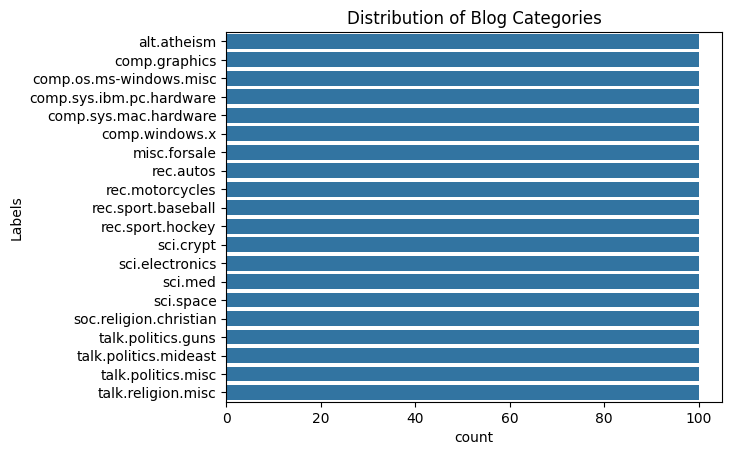

In [14]:
# Visualize category distribution
sns.countplot(y='Labels', data=data, order=data['Labels'].value_counts().index)
plt.title("Distribution of Blog Categories")
plt.show()

In [15]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

In [16]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [17]:
data['Cleaned_Text'] = data['Data'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\dhivya.dharani/nltk_data'
    - 'c:\\Users\\dhivya.dharani\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\dhivya.dharani\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\dhivya.dharani\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\dhivya.dharani\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [18]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X = tfidf.fit_transform(data['Data']).toarray()
y = data['Labels']

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Naive Bayes Model for Text Classification
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.45      0.56        20
           comp.graphics       0.75      0.75      0.75        20
 comp.os.ms-windows.misc       0.91      1.00      0.95        20
comp.sys.ibm.pc.hardware       0.65      0.85      0.74        20
   comp.sys.mac.hardware       1.00      0.70      0.82        20
          comp.windows.x       0.88      0.70      0.78        20
            misc.forsale       0.89      0.80      0.84        20
               rec.autos       0.77      0.85      0.81        20
         rec.motorcycles       0.83      0.75      0.79        20
      rec.sport.baseball       0.90      0.90      0.90        20
        rec.sport.hockey       0.86      0.95      0.90        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.87      0.65      0.74        20
                 sci.med       0.94      0.75      

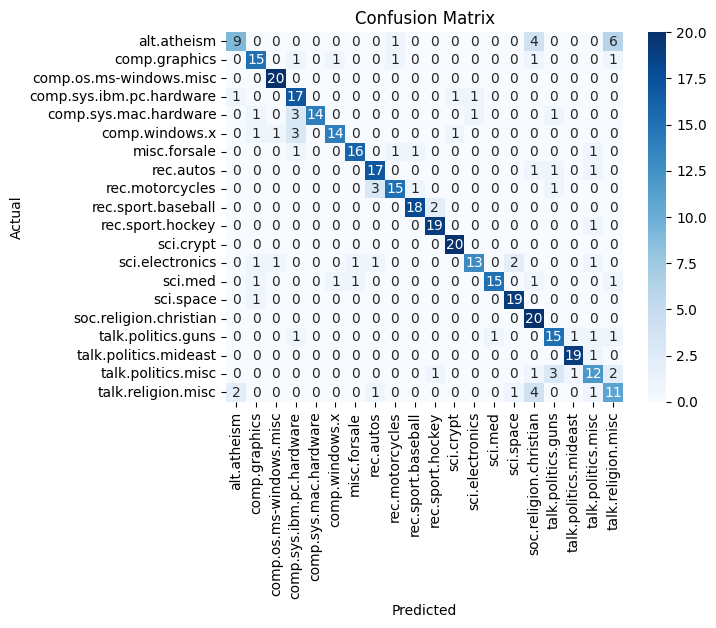

In [20]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

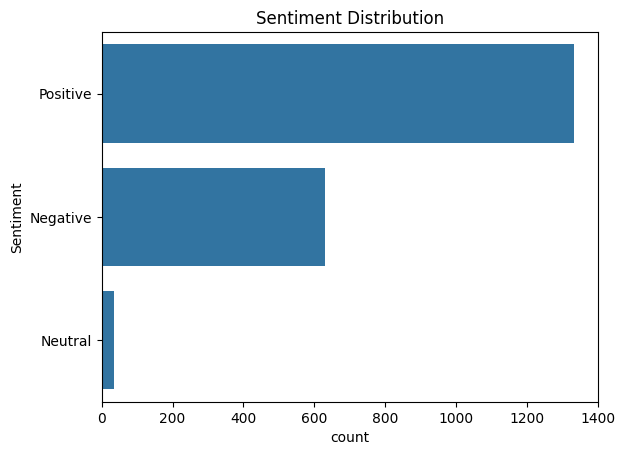

In [22]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Data'].apply(get_sentiment)

# Sentiment Distribution
sns.countplot(y='Sentiment', data=data, order=data['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.show()

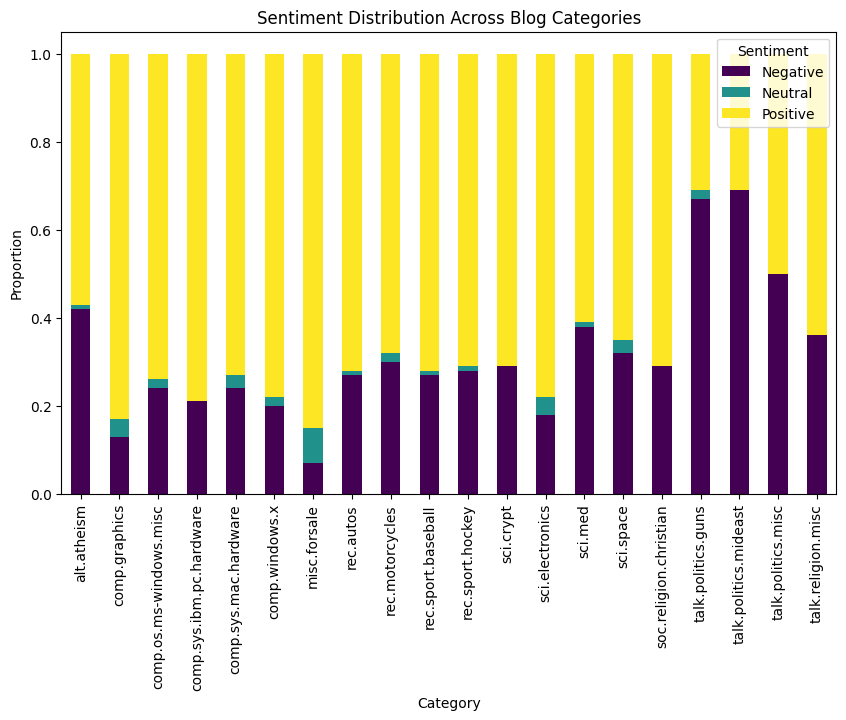

In [23]:
# Sentiment Analysis Across Categories
category_sentiment = data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Sentiment Distribution Across Blog Categories")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.show()

In [24]:
# Summary and Reflection
print("\nKey Insights from Sentiment Analysis:")
for category in data['Labels'].unique():
    sentiment_dist = data[data['Labels'] == category]['Sentiment'].value_counts(normalize=True)
    print(f"\nCategory: {category}")
    print(sentiment_dist)


Key Insights from Sentiment Analysis:

Category: alt.atheism
Sentiment
Positive    0.57
Negative    0.42
Neutral     0.01
Name: proportion, dtype: float64

Category: comp.graphics
Sentiment
Positive    0.83
Negative    0.13
Neutral     0.04
Name: proportion, dtype: float64

Category: comp.os.ms-windows.misc
Sentiment
Positive    0.74
Negative    0.24
Neutral     0.02
Name: proportion, dtype: float64

Category: comp.sys.ibm.pc.hardware
Sentiment
Positive    0.79
Negative    0.21
Name: proportion, dtype: float64

Category: comp.sys.mac.hardware
Sentiment
Positive    0.73
Negative    0.24
Neutral     0.03
Name: proportion, dtype: float64

Category: comp.windows.x
Sentiment
Positive    0.78
Negative    0.20
Neutral     0.02
Name: proportion, dtype: float64

Category: misc.forsale
Sentiment
Positive    0.85
Neutral     0.08
Negative    0.07
Name: proportion, dtype: float64

Category: rec.autos
Sentiment
Positive    0.72
Negative    0.27
Neutral     0.01
Name: proportion, dtype: float64

Ca